# Task
Analyze and visualize the data from the files "/content/ipl_2022_deliveries.csv", "/content/ipl_2023_deliveries.csv", "/content/ipl_2024_deliveries.csv", and "/content/ipl_2025_deliveries.csv".

## Load data

### Subtask:
Load the four CSV files into separate pandas DataFrames.


**Reasoning**:
Import pandas and load the four CSV files into separate DataFrames as instructed.



In [1]:
import pandas as pd

df_2022 = pd.read_csv("/content/ipl_2022_deliveries.csv")
df_2023 = pd.read_csv("/content/ipl_2023_deliveries.csv")
df_2024 = pd.read_csv("/content/ipl_2024_deliveries.csv")
df_2025 = pd.read_csv("/content/ipl_2025_deliveries.csv")

## Combine data

### Subtask:
Concatenate the DataFrames into a single DataFrame for unified analysis.


**Reasoning**:
Concatenate the four DataFrames into a single DataFrame and display its head and info.



In [2]:
dframes = [df_2022, df_2023, df_2024, df_2025]
df_combined = pd.concat(dframes, ignore_index=True)

display(df_combined.head())
display(df_combined.info())

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,...,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder,phase
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,...,0,1,0,0,0,1,NaN,NaN,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,...,0,1,1,0,0,0,NaN,NaN,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,...,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69597 entries, 0 to 69596
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          69597 non-null  int64  
 1   season            69597 non-null  int64  
 2   match_no          69597 non-null  int64  
 3   date              69597 non-null  object 
 4   venue             69597 non-null  object 
 5   batting_team      69597 non-null  object 
 6   bowling_team      69597 non-null  object 
 7   innings           69597 non-null  int64  
 8   over              69597 non-null  float64
 9   striker           69597 non-null  object 
 10  bowler            69597 non-null  object 
 11  runs_of_bat       69597 non-null  int64  
 12  extras            69597 non-null  int64  
 13  wide              69597 non-null  int64  
 14  legbyes           69597 non-null  int64  
 15  byes              69597 non-null  int64  
 16  noballs           69597 non-null  int64 

None

## Data cleaning and preparation

### Subtask:
Handle missing values, correct data types, and perform any necessary transformations.


**Reasoning**:
I need to handle missing values, correct data types, and perform necessary transformations as outlined in the subtask instructions. I will start by inspecting missing values and data types and then proceed with cleaning and transformations.



In [3]:
display(df_combined.isnull().sum())
display(df_combined.dtypes)

# Convert 'date' to datetime objects
df_combined['date'] = pd.to_datetime(df_combined['date'], format='%b %d, %Y')

# Handle missing values for 'wicket_type', 'player_dismissed', and 'fielder'
# Since these columns are related to dismissals, missing values indicate no dismissal occurred.
# I will fill these with a placeholder like 'not_out' or 'no_wicket'.
df_combined['wicket_type'].fillna('no_wicket', inplace=True)
df_combined['player_dismissed'].fillna('not_out', inplace=True)
df_combined['fielder'].fillna('no_fielder', inplace=True)

# Handle missing values for 'phase'. Missing 'phase' values are only in 2022, 2023 and 2024 dataframes,
# which can be inferred from the 'match_no' column (match_no 1-70 are Group Stage, 71-74 are Playoffs).
def assign_phase(row):
    if pd.notnull(row['phase']):
        return row['phase']
    else:
        if row['match_no'] <= 70:
            return 'Group Stage'
        elif row['match_no'] > 70:
            return 'Playoffs'
        else:
            return 'Unknown' # Should not happen based on data structure

df_combined['phase'] = df_combined.apply(assign_phase, axis=1)


display(df_combined.isnull().sum())
display(df_combined.head())

,0
match_id,0
season,0
match_no,0
date,0
venue,0
batting_team,0
bowling_team,0
innings,0
over,0
striker,0


,0
match_id,int64
season,int64
match_no,int64
date,object
venue,object
batting_team,object
bowling_team,object
innings,int64
over,float64
striker,object


/tmp/ipython-input-3-1942500616.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['wicket_type'].fillna('no_wicket', inplace=True)
/tmp/ipython-input-3-1942500616.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
match_id,0
season,0
match_no,0
date,0
venue,0
batting_team,0
bowling_team,0
innings,0
over,0
striker,0


,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,...,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder,phase
0,202201,2022,1,2022-03-26,"Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,...,0,1,0,0,0,1,no_wicket,not_out,no_fielder,Group Stage
1,202201,2022,1,2022-03-26,"Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,...,0,0,0,0,0,0,no_wicket,not_out,no_fielder,Group Stage
2,202201,2022,1,2022-03-26,"Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,...,0,1,1,0,0,0,no_wicket,not_out,no_fielder,Group Stage
3,202201,2022,1,2022-03-26,"Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,...,0,0,0,0,0,0,no_wicket,not_out,no_fielder,Group Stage
4,202201,2022,1,2022-03-26,"Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,...,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana,Group Stage


## Exploratory data analysis (eda)

### Subtask:
Analyze key aspects of the data, such as total runs scored, wickets taken, and distribution of different types of dismissals.


**Reasoning**:
Calculate the total runs scored per match, total wickets taken per match, and the distribution of wicket types as per the instructions.



In [4]:
# 1. Calculate total runs scored per match
total_runs_per_match = df_combined.groupby('match_id').apply(lambda x: (x['runs_of_bat'] + x['extras']).sum())

# 2. Calculate total wickets taken per match
# Exclude 'not_out' as it's a placeholder for no dismissal
total_wickets_per_match = df_combined[df_combined['player_dismissed'] != 'not_out'].groupby('match_id')['player_dismissed'].count()

# 3. Calculate distribution of different wicket types
# Exclude 'no_wicket' as it's a placeholder for no dismissal
wicket_type_distribution = df_combined[df_combined['wicket_type'] != 'no_wicket']['wicket_type'].value_counts()

# Display the results
print("Total Runs Scored per Match:")
display(total_runs_per_match.head())

print("\nTotal Wickets Taken per Match:")
display(total_wickets_per_match.head())

print("\nDistribution of Wicket Types:")
display(wicket_type_distribution)

Total Runs Scored per Match:


,0
match_id,
202201,264
202202,356
202203,413
202204,319
202205,359



Total Wickets Taken per Match:


,player_dismissed
match_id,
202201,9
202202,11
202203,7
202204,11
202205,13



Distribution of Wicket Types:


,count
wicket_type,
caught,2524
bowled,520
lbw,225
runout,203
stumped,69
hit wicket,5
retired out,3
retired hurt,2
obstructing the field,1


## Visualize data

### Subtask:
Create visualizations to represent the findings from the EDA, such as plots showing trends over the years or distributions of key metrics.


**Reasoning**:
Create the requested visualizations to represent the findings from the EDA.



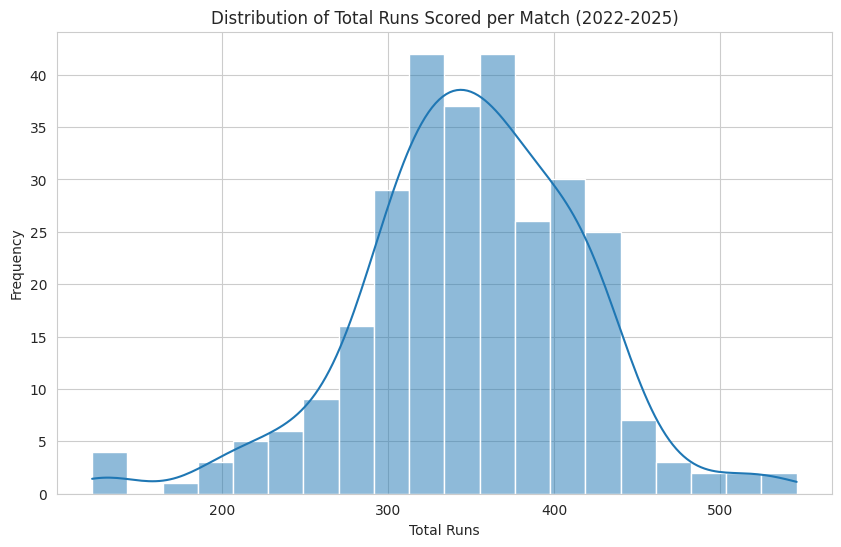

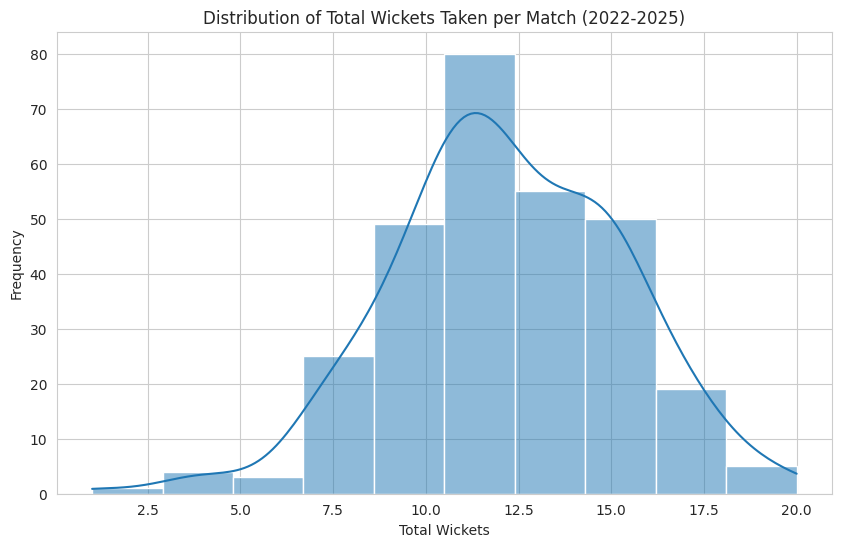

/tmp/ipython-input-5-1208034088.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wicket_type_distribution.index, y=wicket_type_distribution.values, palette='viridis')


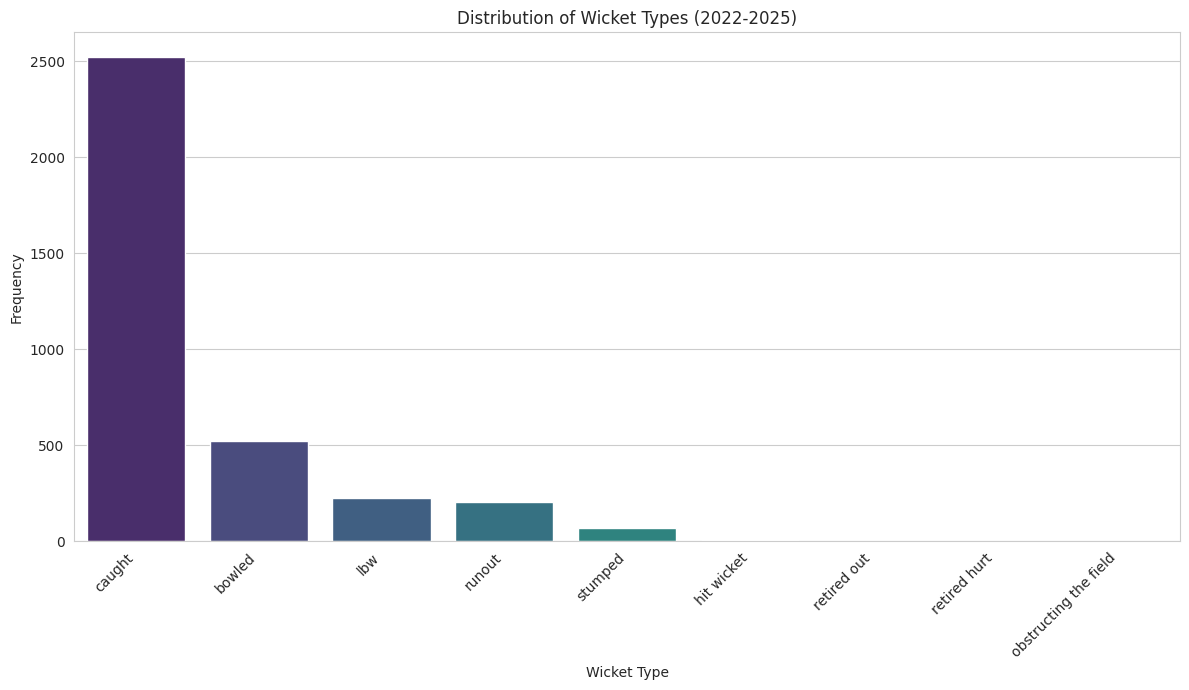

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# 1. Histogram of total runs per match
plt.figure(figsize=(10, 6))
sns.histplot(total_runs_per_match, bins=20, kde=True)
plt.title('Distribution of Total Runs Scored per Match (2022-2025)')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.show()

# 2. Histogram of total wickets per match
plt.figure(figsize=(10, 6))
sns.histplot(total_wickets_per_match, bins=10, kde=True)
plt.title('Distribution of Total Wickets Taken per Match (2022-2025)')
plt.xlabel('Total Wickets')
plt.ylabel('Frequency')
plt.show()

# 3. Bar plot of wicket type distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=wicket_type_distribution.index, y=wicket_type_distribution.values, palette='viridis')
plt.title('Distribution of Wicket Types (2022-2025)')
plt.xlabel('Wicket Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The distribution of total runs scored per match across the 2022-2025 IPL seasons is visualized in a histogram, showing the frequency of different run totals.
*   The distribution of total wickets taken per match across the 2022-2025 IPL seasons is shown in a histogram, indicating the frequency of different wicket counts.
*   A bar plot illustrates the distribution of wicket types, revealing that "caught" is the most frequent type of dismissal, followed by "bowled" and "lbw".

### Insights or Next Steps

*   Further analysis could explore trends in runs scored and wickets taken over the years to see if there are significant year-on-year variations.
*   Investigate the distribution of wicket types by bowling style (pace vs. spin) to understand their impact on dismissals.
